In [3]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import DataFrame,Series

# stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [5]:
import requests
from io import StringIO 

In [7]:
# get info in text form, then convert with StringIO for pandas
url='http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)

In [11]:
# getting to know my data types better
type(poll_data)

_io.StringIO

In [13]:
poll_df = pd.read_csv(poll_data)

In [14]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [15]:
poll_df.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


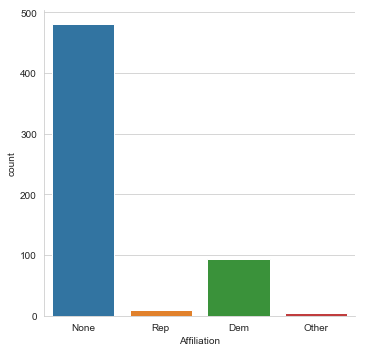

In [17]:
sns.catplot('Affiliation',kind='count',data=poll_df)

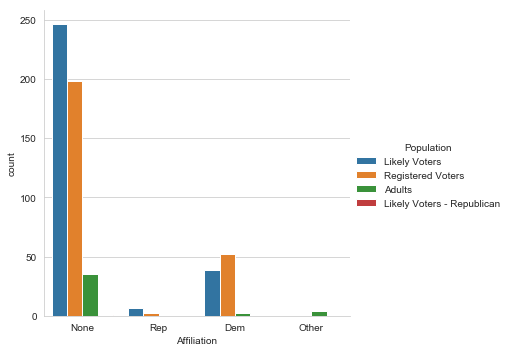

In [18]:
sns.catplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [26]:
# lets look at averages for Romney and Obama
avg = DataFrame(poll_df.mean())

# need to clean up some unwanted entries in the DataFrame
# when dropping a 'row', use axis=0
# when dropping a 'column', use axis = 1
avg.drop(['Number of Observations','Question Text','Question Iteration'],axis=0,inplace=True)
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [27]:
# lets also get the standard deviations
std = DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Text','Question Iteration'],axis=0,inplace=True)
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


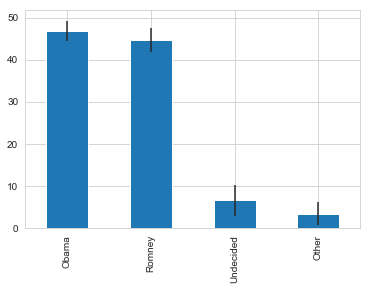

In [30]:
# sentiment of the polls, with margin of error as 'yerr' line

# yerr = y-axis error
avg.plot(yerr=std,kind='bar',legend=False)

In [39]:
# lets consider undecided factor and combine avg and std into 1 DataFrame
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','StdDev']
poll_avg

,Average,StdDev
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


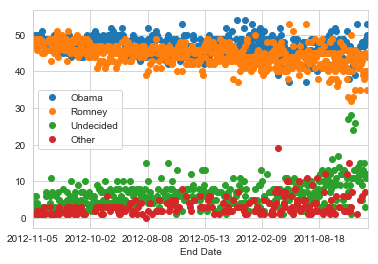

In [41]:
# visually, how did voter sentiment in each category change over time
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided','Other'],linestyle='',marker='o')

In [42]:
from datetime import datetime

In [43]:
# lets make a different abs(Obama-Romney) and plot that instead
# create a new column in the poll DataFrame

poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1,0.00
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1,0.01
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,0.02
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,0.00
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1,0.02


In [44]:
# as_index set to False preserves the existing index instead of using StartDate
# also taking mean() since some polls start on the same date
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head(10)

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09
5,2009-07-18,1000.0,45.0,45.0,3.0,7.0,NaN,1,0.00
6,2009-08-14,956.0,47.0,39.0,13.5,NaN,NaN,1,0.08
7,2009-09-21,621.0,48.0,39.0,13.0,NaN,NaN,1,0.09
8,2009-10-16,766.0,48.0,40.0,12.0,NaN,NaN,1,0.08
9,2009-11-13,1066.0,48.0,43.0,9.0,NaN,NaN,1,0.05


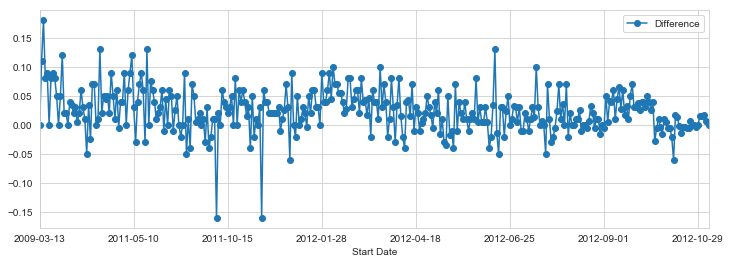

In [47]:
# figsize changes the size of the plot, variable is a tuple
poll_df.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',linestyle='-')

# observation, Obama has some bad days (or Romney has very good days) near '2011-10-15'

In [59]:
# let's focus on the debates by zooming into October 2012
row_in = 0
xlimit = []

# scan the DataFrame for start dates starting with '2012-10' in the first 7 characters
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print(min(xlimit))
print(max(xlimit))

325
352


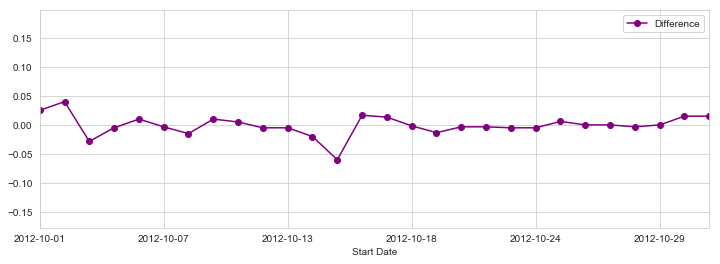

In [61]:
poll_df.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',color='purple',xlim=(min(xlimit),max(xlimit)))

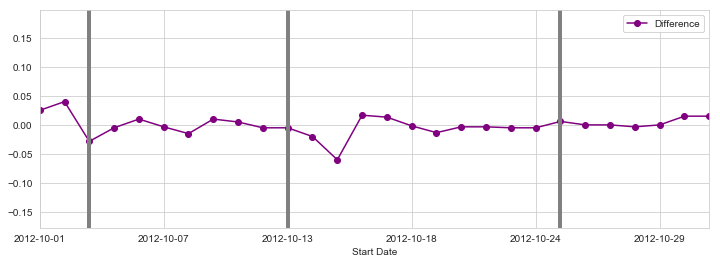

In [64]:
# lets overlay the debate dates, Oct 3rd (+2 from start of array), 11th (+10), 22nd (+21)

poll_df.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',color='purple',xlim=(min(xlimit),max(xlimit)))
# to make vertical lines:
plt.axvline(x=(min(xlimit)+2),linewidth=4,color='grey')
plt.axvline(x=(min(xlimit)+10),linewidth=4,color='grey')
plt.axvline(x=(min(xlimit)+21),linewidth=4,color='grey')


In [65]:
# big file, 150mb (~1m rows x 16 columns)
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.info()

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [66]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [72]:
# what are the top donation amounts?
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [75]:
donor_mean = donor_df['contb_receipt_amt'].mean()
donor_std = donor_df['contb_receipt_amt'].std()
print('The average and StdDev donations are', round(donor_mean,2), 'and', round(donor_std,2))

The average and StdDev donations are 298.24 and 3749.67


In [83]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()

# observation, lots of refunds in the form of negative values

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [86]:
#lets remove the negative values
top_donor = top_donor[top_donor > 0]
top_donor = top_donor.sort_values()
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [89]:
# are donations usually at round dollar values
# lets check using a histogram

# limit to donations under $2500
common_donations = top_donor[top_donor < 2500]


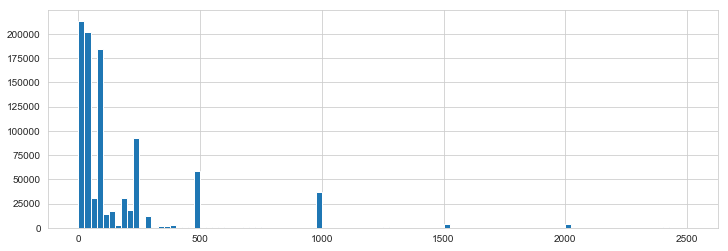

In [92]:
common_donations.hist(bins=100,figsize=(12,4))

In [93]:
# lets separate donations by party affiliation

# make a unique list of candidates
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [ ]:
# lets add a party column using a for loop - very inefficient
for i in range(0,len(donor_df)):
    if donor_df['cand_nm'][i]=='Obama, Barack':
        donor_df['Party'] = 'Democrat'
    else:
        donor_df['Party'] = 'Republican'
        
## if you let this run, expect to wait over 5 minutes (depending on your system performance)

In [98]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [99]:
# lets add a party column using map -- much more efficient

# create a dict of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party2'] = donor_df.cand_nm.map(party_map)

In [101]:
donor_df.tail()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party,Party2
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican
1001730,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-AUG-11,NaN,NaN,NaN,SA17A,751678,Republican,Republican


In [102]:
# clearing out refunds from original DataFrame
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 18 columns):
cmte_id              991475 non-null object
cand_id              991475 non-null object
cand_nm              991475 non-null object
contbr_nm            991475 non-null object
contbr_city          991457 non-null object
contbr_st            991471 non-null object
contbr_zip           991373 non-null object
contbr_employer      983833 non-null object
contbr_occupation    989133 non-null object
contb_receipt_amt    991475 non-null float64
contb_receipt_dt     991475 non-null object
receipt_desc         5219 non-null object
memo_cd              89461 non-null object
memo_text            94274 non-null object
form_tp              991475 non-null object
file_num             991475 non-null int64
Party                991475 non-null object
Party2               991475 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 143.7+ MB


In [106]:
# what are the donation stats per candidate?  (use: groupby)

# number of donors (count, not sum)
donor_df.groupby('cand_nm')['contb_receipt_amt'].count().sort_values()

cand_nm
McCotter, Thaddeus G                  73
Johnson, Gary Earl                  1234
Pawlenty, Timothy                   3844
Huntsman, Jon                       4066
Roemer, Charles E. 'Buddy' III      5844
Perry, Rick                        12709
Bachmann, Michelle                 13082
Cain, Herman                       20052
Santorum, Rick                     46245
Gingrich, Newt                     46883
Romney, Mitt                      105155
Paul, Ron                         143161
Obama, Barack                     589127
Name: contb_receipt_amt, dtype: int64

In [105]:
# now total donation amounts, using sum
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values()

cand_nm
McCotter, Thaddeus G              3.903000e+04
Roemer, Charles E. 'Buddy' III    3.730099e+05
Johnson, Gary Earl                5.669616e+05
Bachmann, Michelle                2.711439e+06
Huntsman, Jon                     3.330373e+06
Pawlenty, Timothy                 6.004819e+06
Cain, Herman                      7.101082e+06
Santorum, Rick                    1.104316e+07
Gingrich, Newt                    1.283277e+07
Perry, Rick                       2.030575e+07
Paul, Ron                         2.100962e+07
Romney, Mitt                      8.833591e+07
Obama, Barack                     1.358774e+08
Name: contb_receipt_amt, dtype: float64

In [110]:
# print via text
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values()
i = 0
for don in cand_amount:
    print('The candidate', cand_amount.index[i], 'raised', don)
    i+=1

The candidate McCotter, Thaddeus G raised 39030.0
The candidate Roemer, Charles E. 'Buddy' III raised 373009.9
The candidate Johnson, Gary Earl raised 566961.6
The candidate Bachmann, Michelle raised 2711439.29
The candidate Huntsman, Jon raised 3330373.48
The candidate Pawlenty, Timothy raised 6004819.48
The candidate Cain, Herman raised 7101081.89
The candidate Santorum, Rick raised 11043159.31
The candidate Gingrich, Newt raised 12832769.69
The candidate Perry, Rick raised 20305754.0
The candidate Paul, Ron raised 21009619.83
The candidate Romney, Mitt raised 88335907.53
The candidate Obama, Barack raised 135877427.24


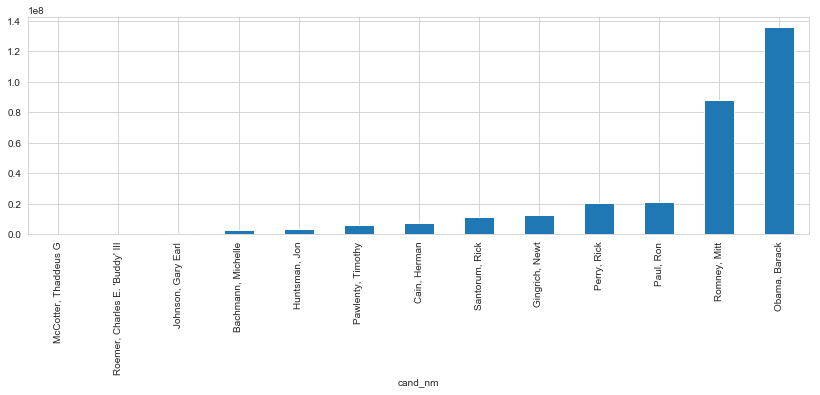

In [113]:
# lets represent it more visually
cand_amount.plot(kind='bar',figsize=(14,4))

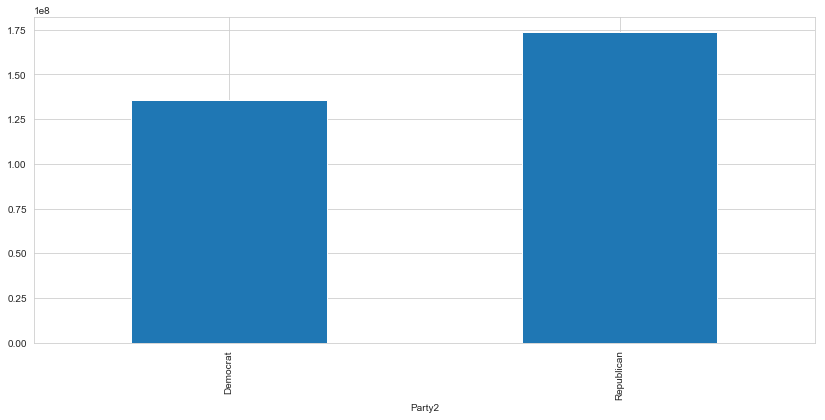

In [116]:
# how much did all Republicans do against Barack, the only Democrat
donor_df.groupby('Party2')['contb_receipt_amt'].sum().plot(kind='bar',figsize=(14,6))

# observation - Republicans outpaced Demoncrats, although divided by many candidates

In [118]:
# let's look at occupations of those who donated

occ_df = donor_df.pivot_table('contb_receipt_amt',
                              index='contbr_occupation',
                              columns='Party2',
                              aggfunc='sum')

In [120]:
occ_df.head()

Party2,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [121]:
occ_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45067 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
Democrat      29166 non-null float64
Republican    21081 non-null float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [123]:
# shows the dimensions of the data
occ_df.shape

(45067, 2)

In [125]:
# too many small amounts from various occupations, let's limit to $1m

occ_df = occ_df[occ_df.sum(1) > 1000000]

In [126]:
# significantly reduced dataset focusing on large numbers
occ_df.shape

(31, 2)

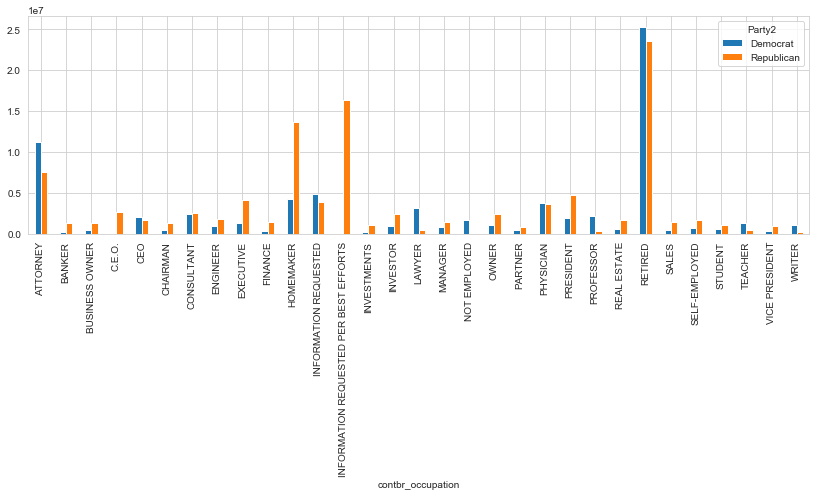

In [128]:
occ_df.plot(kind='bar',figsize=(14,4))

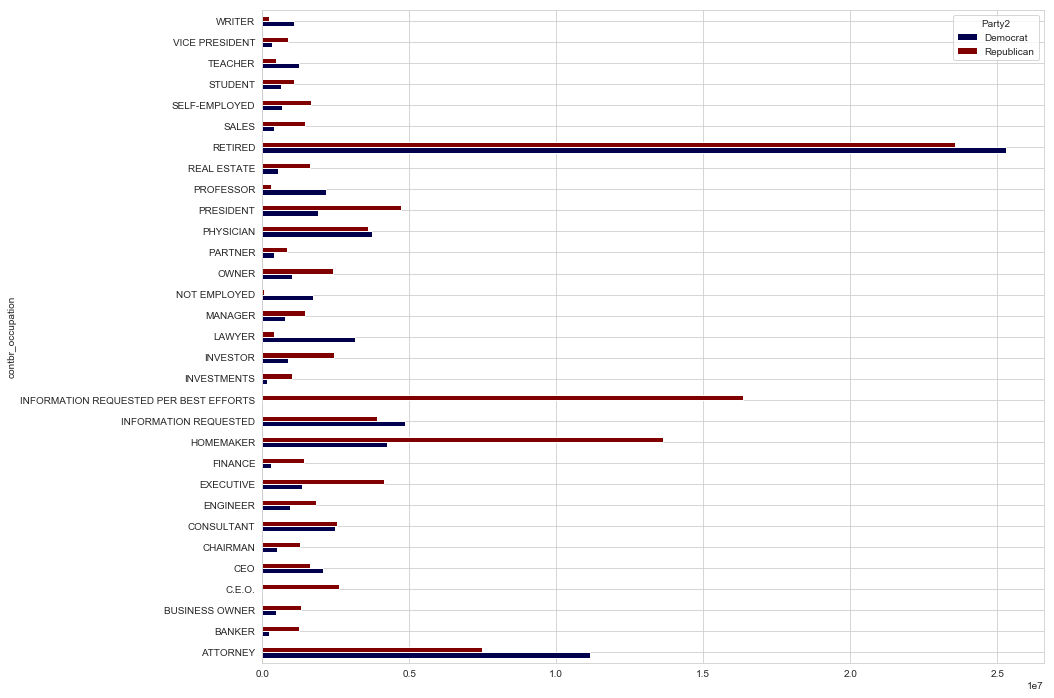

In [131]:
# cmap = colormap
# barh --> gives you horizontal bar plot
occ_df.plot(kind='barh',figsize=(14,12),cmap='seismic')

In [133]:
# need to clean some data, combine CEO and C.E.O, and drop 'INFO REQUESTED' fields which are really 'NA'
occ_df.drop(['INFORMATION REQUESTED','INFORMATION REQUESTED PER BEST EFFORTS'],axis=0,inplace=True)

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


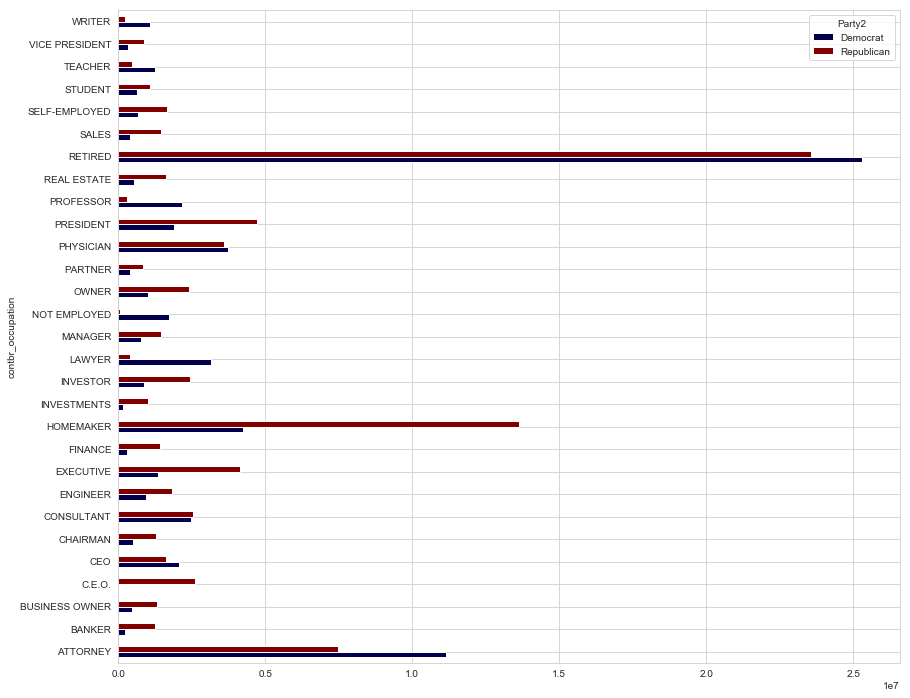

In [134]:
# redraw chart
occ_df.plot(kind='barh',figsize=(14,12),cmap='seismic')

In [135]:
# now handle the CEO data
occ_df.loc['CEO'] = occ_df.loc['CEO'] + occ_df.loc['C.E.O.']

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/dorkyegg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
occ_df.drop('C.E.O.',inplace=True)

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


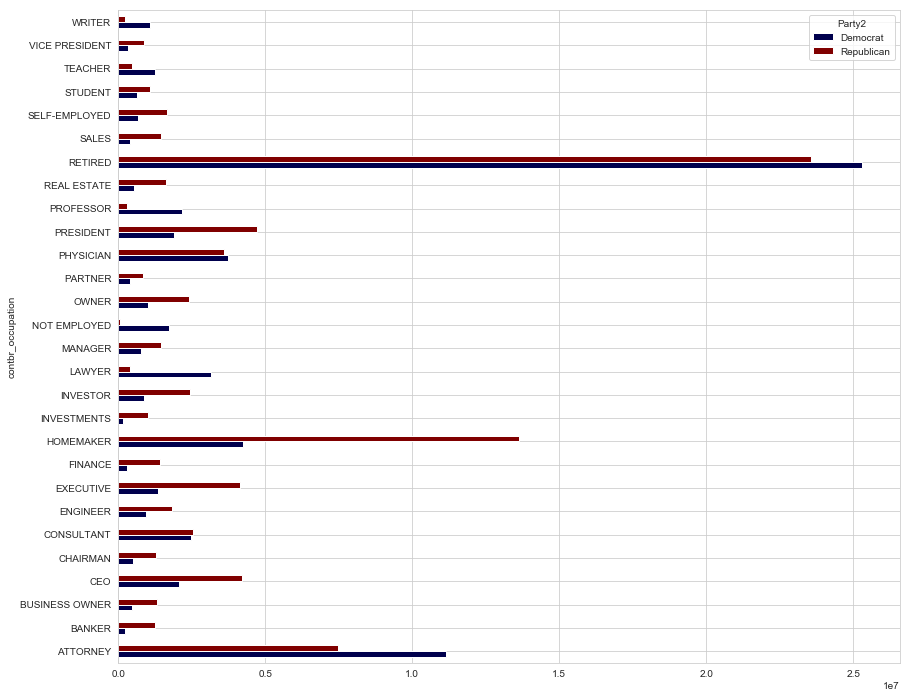

In [140]:
occ_df.plot(kind='barh',figsize=(14,12),cmap='seismic')